# Desafio de Classificação



**Nome:** Julia Carolina Frare Peixoto

**nUSP:** 10734727

**Link do repositório:** https://github.com/juliafrare/SCC0277

## Descrição do problema

O problema consiste em tentar prever se um hóspede irá cancelar sua reserva em um hotel, com base no seguinte [dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?resource=download). As colunas do dataset são as seguintes:

- **Booking_ID:** id único de cada reserva
- **no_of_adults:** número de adultos
- **no_of_children:** número de crianças
- **no_of_weekend_nights:** número de noites agendadas durante um fim de semana
- **no_of_week_nights:** número de noites agendadas durante um dia de semana
- **type_of_meal_plan:** tipo de plano de refeição escolhido pelo hóspede
- **required_car_parking_space:** o hóspede reservou uma vaga de estacionamento?
- **room_type_reserved:** tipo de quarto reservado pelo hóspede
- **lead_time:** número de dias entre o agendamento e a data de chegada
- **arrival_year:** ano de chegada
- **arrival_month:** mês de chegada
- **arrival_day:** dia de chegada
- **market_segment_type:** segmento de mercado
- **repeated_guest:** o cliente já se hospedou aqui antes?
- **no_of_previous_cancellations:** número de cancelamentos anteriores
- **no_of_previous_bookings_not_canceled:** número de reservas anteriores que não foram canceladas
- **avg_price_per_room:** preço médio por quarto no dia da reserva, preços dos quartos são dinâmicos
- **no_of_special_requests:** número de pedidos especiais do hóspede
- **booking_status:** indica se o agendamento foi cancelado ou não

## Análise do dataset e pré-processamento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [2]:
# Importando o dataset
df = pd.read_csv('HotelReservations.csv')

df.shape

(36275, 19)

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Podemos notar que o dataset possui 17 atributos diferentes. Podemos remover a variável "Booking_ID", uma vez que ela pode ser representada pelos índices da tabela.

In [4]:
# Remoção da variável Booking_ID
df = df.drop('Booking_ID', axis=1)

### Remoção de linhas com valores faltantes

Um dos primeiros passos é identificar as linhas com valores faltantes, pois esses dados podem causar problemas como imprecisão, viés e aumento do erro padrão.

In [5]:
print("Após remoção das linhas com valores faltantes:")
df = df.dropna()
print(df.shape)

Após remoção das linhas com valores faltantes:
(36275, 18)


Uma vez que nenhuma linha foi removida, é possível concluir que o dataset não possui dados faltantes.

### Remoção de dados redundantes

#### Dados duplicados

Considerando que o dataset é relativamente grande (>30k linhas), é imprescindível verificar a existência de dados duplicados, pois dependendo da quantidade de dados duplicados, isso pode levar a um inchamento do dataset, o que reduz a performance consideravelmente.

In [6]:
print("Após remoção da redundância:")
df = df.drop_duplicates(keep='first')
print(df.shape)

Após remoção da redundância:
(26000, 18)


#### Atributos altamente correlacionados

Após a remoção dos dados duplicados, é necessário verificar se o dataset possui atributos altamente correlacionados. No caso da existência desses atributos, é possível remover um (ou mais) deles para diminuir a redundância e melhorar a performance dos algoritmos ao processar este dataset.

In [7]:
max_corr = 0.8

corr = df.corr()
m_sup = np.triu(np.ones(corr.shape),k=1).astype(np.bool)
corr_sup = corr.where(m_sup)
print("Matriz superior com correlação:")
print(corr_sup)

Matriz superior com correlação:
                                      no_of_adults  no_of_children  \
no_of_adults                                   NaN       -0.049246   
no_of_children                                 NaN             NaN   
no_of_weekend_nights                           NaN             NaN   
no_of_week_nights                              NaN             NaN   
required_car_parking_space                     NaN             NaN   
lead_time                                      NaN             NaN   
arrival_year                                   NaN             NaN   
arrival_month                                  NaN             NaN   
arrival_date                                   NaN             NaN   
repeated_guest                                 NaN             NaN   
no_of_previous_cancellations                   NaN             NaN   
no_of_previous_bookings_not_canceled           NaN             NaN   
avg_price_per_room                             NaN        

In [8]:
atrib = [col for col in corr_sup.columns if any(corr_sup[col] >= max_corr)]
print("Atributos com alta correlação:")
print(atrib)

Atributos com alta correlação:
[]


Uma vez que o dataset não possui atributos altamente relacionados, podemos continuar sem remover nenhuma coluna.

### Normalização dos dados

Aqui será utilizado o método *z-score* para a normalização dos dados. O objetivo da normalização (ou padronização) é diminuir a influência dos atributos com maiores variações.

In [9]:
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
no_of_adults,26000.000000,1.890000,0.528702,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,26000.000000,0.141231,0.462502,0.000000,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,26000.000000,0.882385,0.887371,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_week_nights,26000.000000,2.261923,1.512341,0.000000,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,26000.000000,0.042115,0.200856,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,26000.000000,66.452846,68.606799,0.000000,12.000000,44.000000,100.000000,443.000000
arrival_year,26000.000000,2017.850269,0.356814,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000
arrival_month,26000.000000,7.332923,3.138925,1.000000,5.000000,8.000000,10.000000,12.000000
arrival_date,26000.000000,15.750231,8.849394,1.000000,8.000000,16.000000,23.000000,31.000000
repeated_guest,26000.000000,0.032769,0.178035,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
# z-score
df_norm = df.select_dtypes(include='number')
df_norm = (df_norm - df_norm.mean(numeric_only=True)) / (df_norm.std(numeric_only=True))
df[df_norm.columns] = df_norm

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.208057,-0.305362,0.132544,-0.173190,Meal Plan 1,-0.209679,Room_Type 1,2.296378,-2.382947,0.849679,-1.553805,Offline,-0.18406,-0.069795,-0.103042,-1.074432,-0.910260,Not_Canceled
1,0.208057,-0.305362,1.259468,0.488036,Not Selected,-0.209679,Room_Type 1,-0.895725,0.419632,1.168259,-1.101796,Online,-0.18406,-0.069795,-0.103042,0.025983,0.316569,Not_Canceled
2,-1.683367,-0.305362,1.259468,-0.834417,Meal Plan 1,-0.209679,Room_Type 1,-0.954029,0.419632,-1.698965,1.384249,Online,-0.18406,-0.069795,-0.103042,-1.206440,-0.910260,Canceled
3,0.208057,-0.305362,-0.994380,-0.173190,Meal Plan 1,-0.209679,Room_Type 1,2.106893,0.419632,-0.743224,0.480233,Online,-0.18406,-0.069795,-0.103042,-0.150379,-0.910260,Canceled
4,0.208057,-0.305362,0.132544,-0.834417,Not Selected,-0.209679,Room_Type 1,-0.268965,0.419632,-1.061804,-0.536786,Online,-0.18406,-0.069795,-0.103042,-0.295587,-0.910260,Canceled


### Variáveis categóricas

Observando a tabela, é possível perceber que as variáveis "type_of_meal_plan", "room_type_reserved" e "	market_segment_type" são categóricas. Sendo assim, é necessário codificá-las para facilitar os próximos passos do processamento e classificação do dataset.

In [11]:
# Variáveis categóricas
print("\nValores categóricos contidos no atributo type_of_meal_plan:")
print(df['type_of_meal_plan'].unique())
print("\nValores categóricos contidos no atributo room_type_reserved:")
print(df['room_type_reserved'].unique())
print("\nValores categóricos contidos no atributo market_segment_type:")
print(df['market_segment_type'].unique())


Valores categóricos contidos no atributo type_of_meal_plan:
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Valores categóricos contidos no atributo room_type_reserved:
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Valores categóricos contidos no atributo market_segment_type:
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']



Visualização dos valores no atributo type_of_meal_plan:


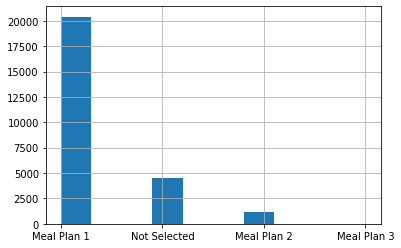

In [12]:
# type_of_meal_plan
print("\nVisualização dos valores no atributo type_of_meal_plan:")
df['type_of_meal_plan'].hist()
plt.show()

Uma vez que a categoria "Meal Plan 3" é negligível, podemos removê-la do dataset.

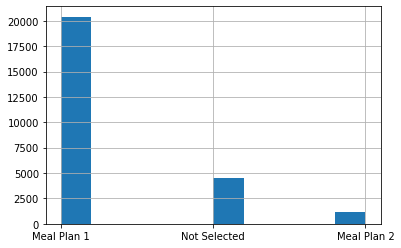

In [13]:
df = df[(df['type_of_meal_plan']!='Meal Plan 3')]
df['type_of_meal_plan'].hist()
plt.show()

In [14]:
# Gerando as variáveis dummy e adicionando elas no dataset, substituindo a variável original
dummies = pd.get_dummies(df['type_of_meal_plan'])
df = df.drop('type_of_meal_plan', axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)


Visualização dos valores no atributo room_type_reserved:


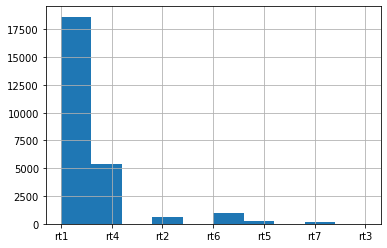

In [15]:
# room_type_reserved
print("\nVisualização dos valores no atributo room_type_reserved:")
df['room_type_reserved'] = df['room_type_reserved'].replace(['Room_Type 1','Room_Type 2','Room_Type 3','Room_Type 4','Room_Type 5','Room_Type 6','Room_Type 7'],['rt1','rt2','rt3','rt4','rt5','rt6','rt7'])
df['room_type_reserved'].hist()
plt.show()

Uma vez que algumas categorias possuem valores muito baixos, podemos fundi-las numa única categoria.

rt1    0.717023
rt4    0.208579
rt6    0.036276
rt2    0.023081
rt5    0.008925
rt7    0.005886
rt3    0.000231
Name: room_type_reserved, dtype: float64


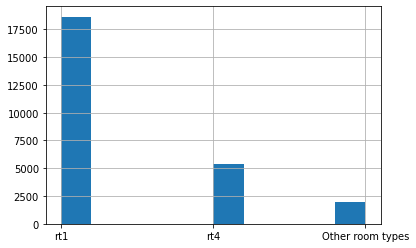

In [16]:
# Frequências de cada categoria
freq = df['room_type_reserved'].value_counts(normalize=True)
print(freq)

# Fundindo as categorias que representam <10% de casos
df['room_type_reserved'] = df['room_type_reserved'].mask(df['room_type_reserved'].map(freq) < 0.1, 'Other room types')
df['room_type_reserved'].hist()
plt.show()

In [17]:
# Gerando as variáveis dummy e adicionando elas no dataset, substituindo a variável original
dummies = pd.get_dummies(df['room_type_reserved'])
df = df.drop('room_type_reserved', axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)


Visualização dos valores no atributo market_segment_type:


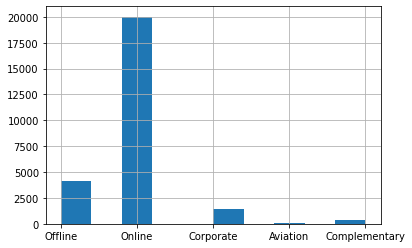

In [18]:
# market_segment_type
print("\nVisualização dos valores no atributo market_segment_type:")
df['market_segment_type'].hist()
plt.show()

Online           0.770110
Offline          0.158146
Corporate        0.054318
Complementary    0.013580
Aviation         0.003847
Name: market_segment_type, dtype: float64


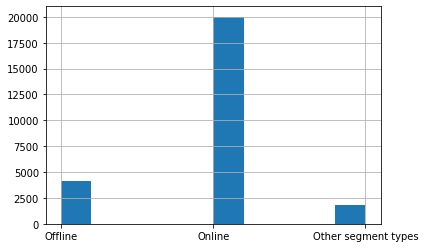

In [19]:
# Frequências de cada categoria
freq = df['market_segment_type'].value_counts(normalize=True)
print(freq)

# Fundindo as categorias que representam <10% de casos
df['market_segment_type'] = df['market_segment_type'].mask(df['market_segment_type'].map(freq) < 0.1, 'Other segment types')
df['market_segment_type'].hist()
plt.show()

In [20]:
# Gerando as variáveis dummy e adicionando elas no dataset, substituindo a variável original
dummies = pd.get_dummies(df['market_segment_type'])
df = df.drop('market_segment_type', axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)


Visualização dos valores no atributo booking_status:


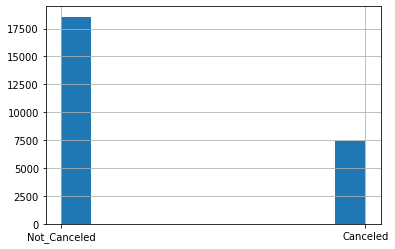

In [21]:
# booking_status
print("\nVisualização dos valores no atributo booking_status:")
df['booking_status'].hist()
plt.show()

dummies = pd.get_dummies(df['booking_status'])
df = df.drop('booking_status', axis=1)
df = pd.concat([df, dummies], axis=1, sort=False)

In [22]:
# Uma vez que a variável "booking_status" já é binária, a variável "Not_Canceled" se torna redundante
# e pode ser removida
df = df.drop('Not_Canceled', axis=1)

df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,Meal Plan 1,Meal Plan 2,Not Selected,Other room types,rt1,rt4,Offline,Online,Other segment types,Canceled
0,0.208057,-0.305362,0.132544,-0.173190,-0.209679,2.296378,-2.382947,0.849679,-1.553805,-0.18406,...,1,0,0,0,1,0,1,0,0,0
1,0.208057,-0.305362,1.259468,0.488036,-0.209679,-0.895725,0.419632,1.168259,-1.101796,-0.18406,...,0,0,1,0,1,0,0,1,0,0
2,-1.683367,-0.305362,1.259468,-0.834417,-0.209679,-0.954029,0.419632,-1.698965,1.384249,-0.18406,...,1,0,0,0,1,0,0,1,0,1
3,0.208057,-0.305362,-0.994380,-0.173190,-0.209679,2.106893,0.419632,-0.743224,0.480233,-0.18406,...,1,0,0,0,1,0,0,1,0,1
4,0.208057,-0.305362,0.132544,-0.834417,-0.209679,-0.268965,0.419632,-1.061804,-0.536786,-0.18406,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,0.208057,4.018942,-0.994380,-0.834417,-0.209679,-0.968604,0.419632,0.849679,-1.101796,-0.18406,...,1,0,0,1,0,0,0,1,0,1
36270,2.099480,-0.305362,1.259468,2.471715,-0.209679,0.270340,0.419632,0.212518,-1.440803,-0.18406,...,1,0,0,0,0,1,0,1,0,0
36271,0.208057,-0.305362,0.132544,0.488036,-0.209679,2.354681,0.419632,0.849679,0.141227,-0.18406,...,1,0,0,0,1,0,0,1,0,1
36272,0.208057,-0.305362,1.259468,2.471715,-0.209679,1.188616,0.419632,-0.106063,-1.666807,-0.18406,...,1,0,0,0,1,0,0,1,0,0


### Dados desbalanceados

Para obter uma classificação mais precisa dos dados, é importante que a quantidade dos dados que indicam cada um dos resultados possíveis seja balanceada.

In [23]:
from sklearn.datasets import make_classification

# definindo os dados e o target
X, y = df.drop(['Canceled'],axis=1).values, df['Canceled'].values

# quantidade de dados para cada resultado
(unique, counts) = np.unique(y, return_counts=True)
print(counts)

# calculando a razão de reservas canceladas para o total de reservas
canceled = df.query("Canceled == 1").shape[0]

print("Razão de reservas canceladas: %.2f" % (canceled / df.shape[0]))

[18554  7441]
Razão de reservas canceladas: 0.29


A quantidade de dados está relativamente desbalanceada, com as reservas canceladas sendo apenas 29% do total de reservas. Sendo assim, será necessário balancear os dados. Aqui será utilizado o algoritmo SMOTE Tomek, que reduz a classe majoritária e aumenta a classe minoritária de forma a igualar a quantidade dos dados nas categorias de resultado.

In [24]:
from imblearn.combine import SMOTETomek

# SMOTE Tomek
print("Balanceando os dados com SMOTE Tomek:")
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# quantidade de dados para cada resultado
(unique, counts) = np.unique(y_resampled, return_counts=True)
print(counts)

Balanceando os dados com SMOTE Tomek:
[18002 18002]


### Outliers


Visualização dos valores no atributo no_of_adults:


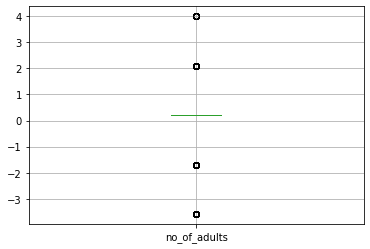


Visualização dos valores no atributo no_of_children:


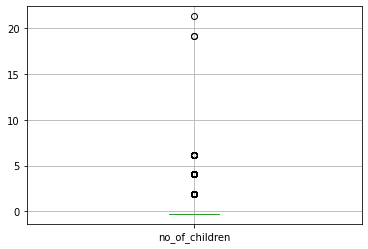


Visualização dos valores no atributo no_of_weekend_nights:


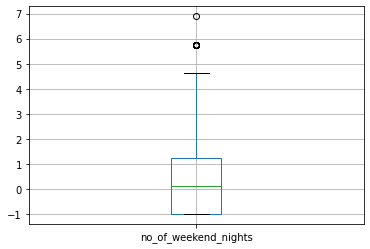


Visualização dos valores no atributo no_of_week_nights:


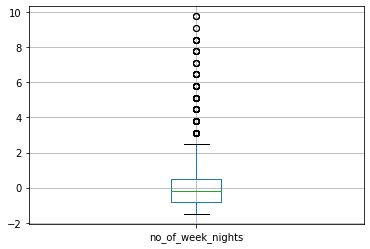


Visualização dos valores no atributo required_car_parking_space:


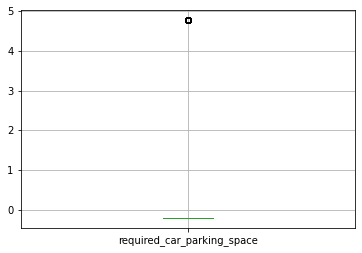


Visualização dos valores no atributo lead_time:


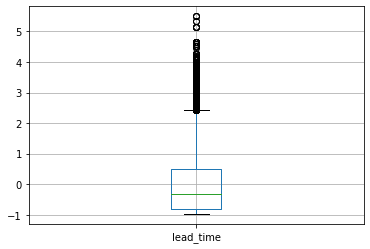


Visualização dos valores no atributo arrival_year:


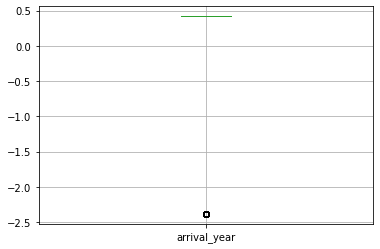


Visualização dos valores no atributo arrival_month:


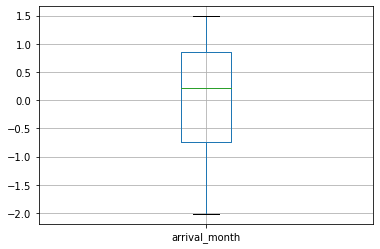


Visualização dos valores no atributo arrival_date:


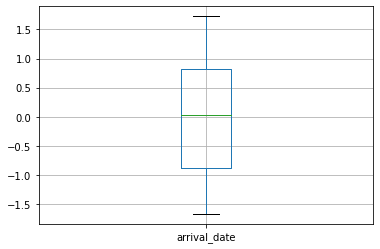


Visualização dos valores no atributo repeated_guest:


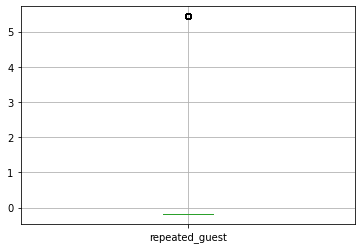


Visualização dos valores no atributo no_of_previous_cancellations:


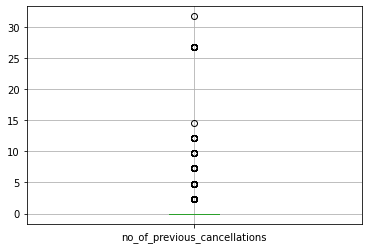


Visualização dos valores no atributo no_of_previous_bookings_not_canceled:


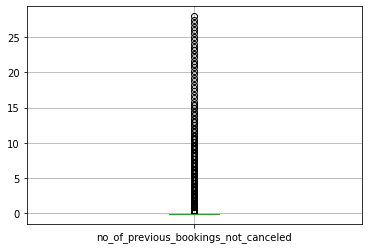


Visualização dos valores no atributo avg_price_per_room:


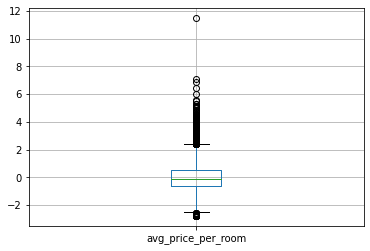


Visualização dos valores no atributo no_of_special_requests:


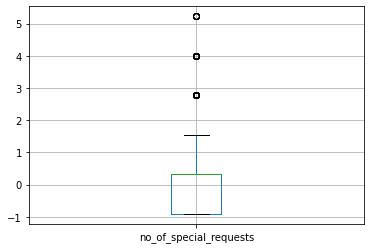


Visualização dos valores no atributo Meal Plan 1:


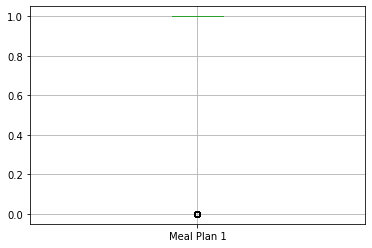


Visualização dos valores no atributo Meal Plan 2:


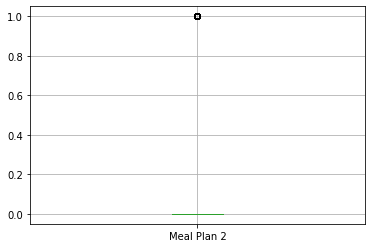


Visualização dos valores no atributo Not Selected:


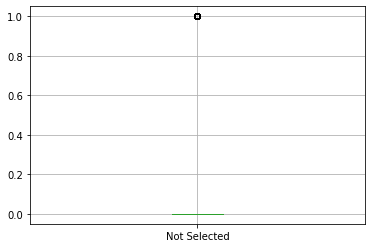


Visualização dos valores no atributo Other room types:


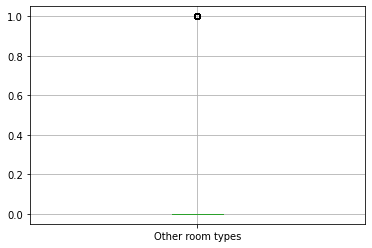


Visualização dos valores no atributo rt1:


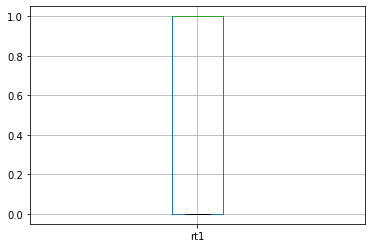


Visualização dos valores no atributo rt4:


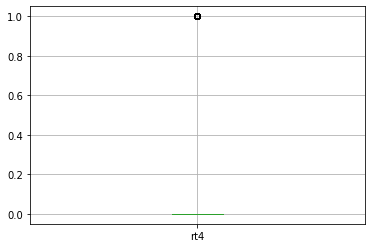


Visualização dos valores no atributo Offline:


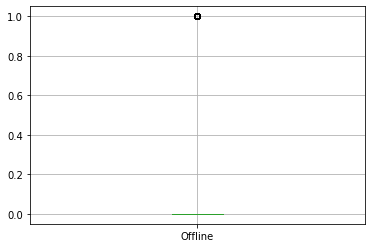


Visualização dos valores no atributo Online:


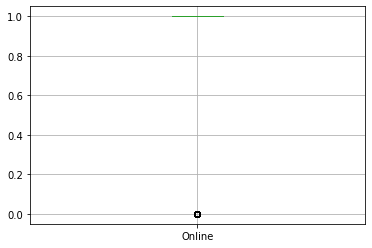


Visualização dos valores no atributo Other segment types:


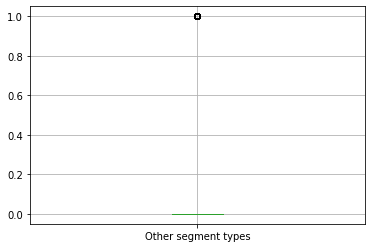


Visualização dos valores no atributo Canceled:


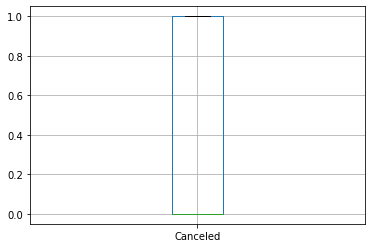

In [25]:
# Função que gera o plot para cada outlier
def plot_outliers(col):
    print(f"\nVisualização dos valores no atributo {col}:")
    df.boxplot([col])
    plt.show()

# selecionam-se apenas as colunas numéricas
columns = df.select_dtypes(include=np.number)

for col in columns:
    plot_outliers(col)

Pode-se notar que para alguns atributos existe uma grande quantidade de outliers.

### PCA

Uma vez que a dimensionalidade é relativamente grande, será utilizado o PCA para reduzir essa dimensionalidade para 10 variáveis, de forma a melhorar a performance dos algoritmos.

(36004, 23)
(36004,)


<AxesSubplot:>

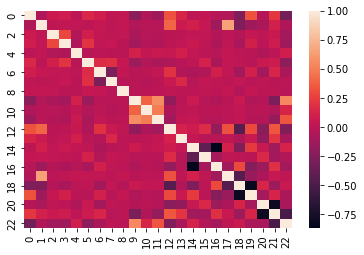

In [26]:
from sklearn.decomposition import PCA, IncrementalPCA
import seaborn as sns

# redefinindo X e y com as versões balanceadas
X, y = X_resampled, y_resampled

print(X.shape)
print(y.shape)

# matriz de correlação das variáveis originais
corr = pd.DataFrame(X).iloc[:,:].corr()
sns.heatmap(corr)

In [27]:
# principal component analysis
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

# incremental principal component analysis
ipca = IncrementalPCA(n_components=10, batch_size=20)
X_ipca = ipca.fit_transform(X)
print(X_ipca.shape)

(36004, 10)
(36004, 10)


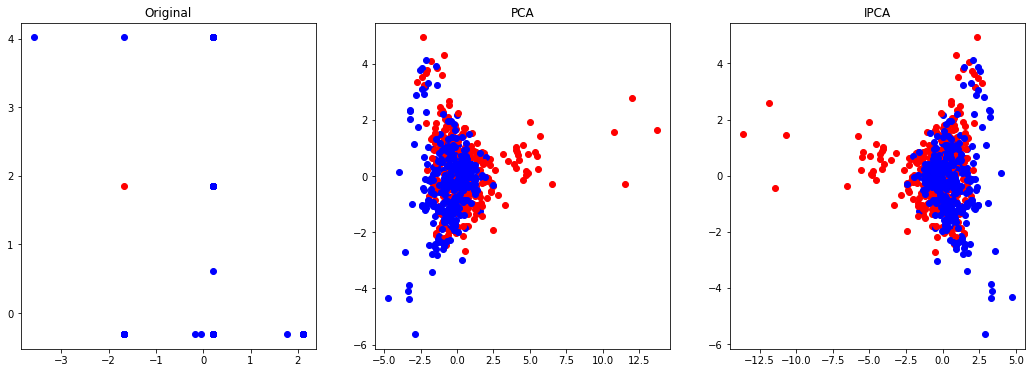

In [28]:
plt.figure(figsize=(18, 6))
colors = ['red', 'blue']

n = X.shape[0]

# plot dos dados originais
plt.subplot(1, 3, 1)
plt.title("Original")
for i in range(0, n, 50):
    plt.scatter(X[i][0], X[i][1], c=colors[y[i]])

# plot do PCA
plt.subplot(1, 3, 2)
plt.title("PCA")
for i in range(0, n, 50):
    plt.scatter(X_pca[i][0], X_pca[i][1], c=colors[y[i]])

# plot do ICA
plt.subplot(1, 3, 3)
plt.title("IPCA")
for i in range(0, n, 50):
    plt.scatter(X_ipca[i][0], X_ipca[i][1], c=colors[y[i]])

plt.show()

## Técnicas Utilizadas

O primeiro passo para classificar os dados é separar os conjuntos de treinamento e de teste.

In [29]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

#gerando o conjunto de treinamento e o conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

print("Conjunto de dados para treinamento:", X_train.shape)
print("Conjunto de rótulos para treinamento:", y_train.shape)

print("\nConjunto de dados para teste:", X_test.shape)
print("Conjunto de rótulos para teste:", y_test.shape)

Conjunto de dados para treinamento: (25202, 23)
Conjunto de rótulos para treinamento: (25202,)

Conjunto de dados para teste: (10802, 23)
Conjunto de rótulos para teste: (10802,)


### Definindo o cross-validation

Antes de classificar os dados, é importante definir o cross-validation para poder verificar a acurácia de cada classificador. Neste caso, será utilizada a técnica k-fold.

In [30]:
# definição do cross-validation
nFolds = 5
kf = KFold(n_splits=nFolds, shuffle=True)

### KNN

KNN (K-Nearest Neighbors) é um algoritmo de aprendizado de máquina supervisionado usado para classificação e regressão. No KNN, o objetivo é encontrar o rótulo de classe (no caso da classificação) ou o valor numérico (no caso da regressão) de um ponto de dados desconhecido com base nos seus "k" vizinhos mais próximos no conjunto de dados de treinamento.

In [31]:
# knn

# 3 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_test, y_test, cv=kf)
print('Acurácia com 3 K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

# 5 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_test, y_test, cv=kf)
print('Acurácia com 7 K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

# 11 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_test, y_test, cv=kf)
print('Acurácia com 11 K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

# 21 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_test, y_test, cv=kf)
print('Acurácia com 21 K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

# 31 vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_test, y_test, cv=kf)
print('Acurácia com 31 K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

Acurácia com 3 K-NN: 0.8060 +/- 0.0056
Acurácia com 7 K-NN: 0.8005 +/- 0.0045
Acurácia com 11 K-NN: 0.7942 +/- 0.0077
Acurácia com 21 K-NN: 0.7902 +/- 0.0079
Acurácia com 31 K-NN: 0.7888 +/- 0.0048


Pode-se perceber que a acurácia aumentou até k=11, porém após isso ela permaneceu aproximadamente igual. Isso significa que não são necessários mais do que 11 vizinhos próximos para obter a acurácia máxima que se pode obter com KNN utilizando este dataset.

### Naive Bayes

O algoritmo Naive Bayes é um algoritmo usado principalmente para tarefas de classificação, embora possa ser usado para tarefas de regressão também. Ele é baseado no Teorema de Bayes, que descreve a probabilidade condicional de um evento ocorrer, dado que outro evento ocorreu.

Naive Bayes é considerado "naive" (ingênuo) porque assume que as características são independentes umas das outras. Ou seja, ele assume que a presença ou ausência de uma característica não está relacionada à presença ou ausência de outras características.

In [32]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
scores = cross_val_score(nb, X_test, y_test, cv=kf)
print('Acurácia com Naive-Bayes: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

Acurácia com Naive-Bayes: 0.6168 +/- 0.0198


### SVM

SVM (Support Vector Machine) é um algoritmo usado principalmente para tarefas de classificação, embora também possa ser usado para tarefas de regressão. O objetivo do SVM é encontrar o hiperplano que melhor separa as classes de dados, maximizando a margem entre elas.

Aqui testaremos o SVM linear e dois tipos de SVM não-linear: RBF (radial basis function) e Polinomial.

In [33]:
# svm linear
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
scores = cross_val_score(svm, X_test, y_test, cv=kf)
print('Acurácia com SVM Linear: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

# svm rbf
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
scores = cross_val_score(svm, X_test, y_test, cv=kf)
print('Acurácia com SVM RBF: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

# svm poly
svm = SVC(kernel='poly', degree=3)
svm.fit(X_train, y_train)
scores = cross_val_score(svm, X_test, y_test, cv=kf)
print('Acurácia com SVM Poly: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

Acurácia com SVM Linear: 0.7862 +/- 0.0095
Acurácia com SVM RBF: 0.8116 +/- 0.0044
Acurácia com SVM Poly: 0.8095 +/- 0.0038


### Árvores de decisão

Árvores de decisão são um algoritmo de aprendizado de máquina supervisionado usado para tarefas de classificação e regressão. Esses algoritmos constroem um modelo de decisão em forma de árvore, em que cada nó interno representa um teste em um atributo, cada ramo representa o resultado do teste e cada folha representa uma decisão ou um valor de saída.

Aqui serão testadas as árvores de decisão Gini e Entropy.

In [34]:
# árvore de decisão gini
dct = tree.DecisionTreeClassifier()
dct.fit(X_train, y_train)
scores = cross_val_score(dct, X, y, cv=kf)
print('Acurácia com Gini: %0.4f +/- %0.4f' % (scores.mean(), scores.std())) 

# árvore de decisão entropy
dct = tree.DecisionTreeClassifier(criterion='entropy')
dct.fit(X_train, y_train)
scores = cross_val_score(dct, X, y, cv=kf)
print('Acurácia com Entropy: %0.4f +/- %0.4f' % (scores.mean(), scores.std())) 

Acurácia com Gini: 0.8593 +/- 0.0054
Acurácia com Entropy: 0.8669 +/- 0.0029


### Ensembles

#### Random forest

Random Forest é um algoritmo de aprendizado de máquina supervisionado que combina várias árvores de decisão para criar um modelo de classificação ou regressão mais robusto e preciso. É um dos algoritmos de ensemble learning mais populares e eficazes.

O funcionamento do Random Forest é baseado em uma técnica chamada bootstrap aggregating (ou bagging). Nessa técnica, várias amostras aleatórias são criadas a partir do conjunto de dados original e uma árvore de decisão é construída a partir de cada amostra. Cada árvore de decisão é treinada com um subconjunto aleatório dos atributos disponíveis. Essa aleatorização ajuda a evitar o overfitting e aumentar a diversidade entre as árvores.

In [35]:
# random forest
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4)
rf.fit(X_train, y_train)
scores = cross_val_score(rf, X_test, y_test, cv=kf)
print('Acurácia Random Forest: %0.4f +/- %0.4f' % (scores.mean(), scores.std())) 

Acurácia Random Forest: 0.8098 +/- 0.0041


#### Adaboost

AdaBoost (Adaptive Boosting) é um algoritmo de aprendizado de máquina supervisionado que visa melhorar a precisão de modelos de aprendizado de máquina fracos, combinando-os em um modelo forte. Ele é um exemplo de um algoritmo de boosting, que tenta melhorar a precisão de modelos mais simples e fracos combinando-os em um modelo mais complexo e preciso.

O funcionamento do AdaBoost é baseado em uma técnica de ponderação, em que as amostras de treinamento são ponderadas de acordo com o desempenho dos modelos fracos. No início, todas as amostras têm o mesmo peso. O algoritmo então treina um modelo fraco em todas as amostras e calcula sua taxa de erro. As amostras que foram classificadas incorretamente pelo modelo fraco são ponderadas mais pesadamente para o próximo modelo fraco, enquanto as amostras que foram classificadas corretamente são ponderadas menos pesadamente. O processo é repetido várias vezes, com cada modelo fraco treinado em amostras ponderadas de forma diferente. No final, os modelos fracos são combinados em um modelo forte usando um esquema de votação ponderado.

In [36]:
# bagging
bag = BaggingClassifier(estimator=SVC(), n_estimators=10)
bag.fit(X_train, y_train)
scores = cross_val_score(bag, X_test, y_test, cv=kf)
print('Acurácia Bagging com SVC: %0.4f +/- %0.4f' % (scores.mean(), scores.std())) 

# pasting
bag = BaggingClassifier(estimator=SVC(), n_estimators=10, bootstrap=False)
bag.fit(X_train, y_train)
scores = cross_val_score(bag, X_test, y_test, cv=kf)
print('Acurácia Pasting com SVC: %0.4f +/- %0.4f' % (scores.mean(), scores.std())) 

# adaboost
bag = AdaBoostClassifier(n_estimators=50)
bag.fit(X_train, y_train)
scores = cross_val_score(bag, X_test, y_test, cv=kf)
print('Acurácia Ada Boost: %0.4f +/- %0.4f' % (scores.mean(), scores.std())) 

Acurácia Bagging com SVC: 0.8134 +/- 0.0051
Acurácia Pasting com SVC: 0.8111 +/- 0.0089
Acurácia Ada Boost: 0.8200 +/- 0.0065


### Multilayer perceptron

Um multilayer perceptron (MLP) é um tipo de rede neural artificial que consiste em múltiplas camadas de neurônios (unidades de processamento), cada uma conectada à camada anterior e posterior. Ele é uma das arquiteturas mais comuns de redes neurais e é frequentemente utilizado em tarefas de aprendizado supervisionado, como classificação e regressão.

O MLP é composto por três tipos de camadas: a camada de entrada, que recebe os dados de entrada, a camada de saída, que produz a saída final da rede e uma ou mais camadas intermediárias, conhecidas como camadas ocultas, que processam os dados de entrada e geram uma representação intermediária para ajudar a rede a aprender características importantes dos dados.

Cada neurônio em uma camada MLP está conectado a todos os neurônios na camada anterior e posterior por meio de pesos ajustáveis. Durante o treinamento, esses pesos são ajustados para minimizar a diferença entre as saídas previstas da rede e as saídas reais correspondentes. Isso é feito usando um algoritmo de aprendizado, como o backpropagation, que propaga o erro através da rede e atualiza os pesos de forma a minimizar a função de perda.

O MLP tem sido amplamente utilizado em diversas aplicações, como reconhecimento de fala, processamento de imagem e processamento de linguagem natural, entre outras.

In [37]:
from sklearn.neural_network import MLPClassifier

# multilayer perceptron
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5, 2), random_state=1, max_iter=5000)
mlp.fit(X_train, y_train)

scores = cross_val_score(mlp, X_test, y_test, cv=kf)
print('Acurácia com Multilayer Perceptron: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

Acurácia com Multilayer Perceptron: 0.8194 +/- 0.0095


### Extra trees

Extra Trees (Extremely Randomized Trees) é um algoritmo de aprendizado de máquina que pertence à família de algoritmos de ensemble learning, juntamente com Random Forest e AdaBoost. É uma variação das árvores de decisão, na qual várias árvores de decisão são construídas a partir do conjunto de dados de treinamento e combinadas para formar um modelo mais preciso e robusto.

A principal diferença entre o Extra Trees e outras variações de árvores de decisão, como o Random Forest, é o processo de divisão dos nós da árvore. Enquanto as árvores de decisão tradicionais selecionam aleatoriamente um subconjunto de atributos e calculam a melhor divisão possível para cada atributo selecionado, o Extra Trees seleciona aleatoriamente um subconjunto de atributos e faz uma divisão aleatória para cada um deles. Ou seja, as divisões são feitas aleatoriamente em vez de serem baseadas em algum critério específico. Isso ajuda a aumentar a diversidade entre as árvores de decisão e reduzir o overfitting.

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

ext = ExtraTreesClassifier(n_estimators=100, random_state=0)
ext.fit(X_train, y_train)

scores = cross_val_score(ext, X_test, y_test, cv=kf)
print('Acurácia com Extra Trees: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

Acurácia com Extra Trees: 0.8712 +/- 0.0086


## Interpretação dos resultados obtidos

De todos os resultados obtidos, pode-se concluir que o melhor modelo foi o Extra Trees com 87% de precisão. Logo após vem as árvores de decisão Gini e Entropy, com 86% cada. Sendo assim, esses foram os melhores modelos para classificar os dados deste dataset e tentar prever se um hóspede irá cancelar sua reserva. Por outro lado, o Naive Bayes foi o pior modelo, com apenas 64% de acurácia.

## Conclusão

Cada dataset tem necessidades diferentes conforme os dados inclusos nele, seu tamanho e quantidade de variáveis, entre outros aspectos. Este dataset, por exemplo, possuia muitos dados redundantes inicialmente, o que poderia ter causado uma piora considerável de performance ao rodar os algoritmos de classificação, ou mesmo o PCA. Por outro lado, não haviam dados ausentes, o que facilitou um pouco do trabalho de pré-processamento. Além disso, o dataset possui uma grande quantidade de outliers, porém ainda assim foi possível obter uma boa acurácia com alguns modelos.

## Apêndice

### Um novo método de detecção de água envenenada usando tecnologia Wi-Fi incorporada a smartphones e algoritmos de aprendizado de máquina

Neste artigo, foram utilizadas as técnicas SVM, KNN, LSTM e AdaBoost.

#### KNN

KNN (K-Nearest Neighbors) é um algoritmo de aprendizado de máquina supervisionado usado para classificação e regressão. No KNN, o objetivo é encontrar o rótulo de classe (no caso da classificação) ou o valor numérico (no caso da regressão) de um ponto de dados desconhecido com base nos seus "k" vizinhos mais próximos no conjunto de dados de treinamento.

O algoritmo KNN funciona da seguinte maneira:

1. Calcule a distância entre o ponto de dados desconhecido e todos os pontos de dados no conjunto de treinamento.
2. Selecione os "k" pontos de dados mais próximos do ponto de dados desconhecido com base na distância calculada.
3. Para classificação, determine a classe mais frequente entre os "k" vizinhos mais próximos e atribua essa classe ao ponto de dados desconhecido. Para regressão, calcule a média dos valores das "k" amostras mais próximas e atribua esse valor ao ponto de dados desconhecido.

O KNN é um algoritmo simples e fácil de implementar, mas pode ser computacionalmente intensivo quando usado em grandes conjuntos de dados, pois é necessário calcular a distância entre cada ponto de dados desconhecido e todos os pontos de dados no conjunto de treinamento.

#### SVM

SVM (Support Vector Machine) é um algoritmo de aprendizado de máquina supervisionado usado principalmente para tarefas de classificação, embora também possa ser usado para tarefas de regressão. O objetivo do SVM é encontrar o hiperplano que melhor separa as classes de dados, maximizando a margem entre elas.

O hiperplano é uma linha que separa as classes de dados. Para dados bidimensionais, o hiperplano é uma linha; para dados tridimensionais, o hiperplano é um plano e, para dados com mais dimensões, o hiperplano é um espaço. O SVM busca encontrar o hiperplano que tem a maior margem possível entre as classes.

A margem é a distância perpendicular do hiperplano às observações mais próximas de cada classe. O SVM encontra o hiperplano que maximiza essa distância, ou seja, que maximiza a margem. Esse hiperplano é chamado de hiperplano de margem máxima.

O SVM usa vetores de suporte para definir o hiperplano de margem máxima. Os vetores de suporte são os pontos de dados mais próximos do hiperplano de margem máxima. Eles são usados para calcular o hiperplano de margem máxima e, portanto, são importantes para a classificação de novos pontos de dados.

O SVM também usa kernels para transformar os dados de entrada em um espaço de recursos de alta dimensão. Isso permite que o SVM encontre um hiperplano de margem máxima mesmo quando os dados não são linearmente separáveis em sua forma original.

O SVM é usado em muitas aplicações, incluindo classificação de imagens, detecção de fraudes, diagnóstico médico e análise de sentimentos. Ele é conhecido por sua eficácia em conjuntos de dados de alta dimensionalidade e por sua capacidade de lidar com dados não linearmente separáveis.

Existem três tipos principais de SVM:

1. SVM de margem rígida (Hard Margin SVM): Este tipo de SVM é usado quando as classes são linearmente separáveis, ou seja, podem ser separadas por um hiperplano sem erros. Nesse caso, o objetivo do SVM é encontrar um hiperplano de margem máxima que separa as classes sem cometer erros.
2. SVM de margem suave (Soft Margin SVM): Este tipo de SVM é usado quando as classes não são linearmente separáveis e alguns erros de classificação são permitidos. Nesse caso, o objetivo do SVM é encontrar o hiperplano de margem máxima que separa as classes com o menor número possível de erros.
3. SVM não linear (Kernel SVM): Este tipo de SVM é usado quando as classes não podem ser separadas por um hiperplano linear. Nesse caso, o SVM usa uma função kernel para mapear os dados de entrada para um espaço de recursos de alta dimensão, onde um hiperplano de margem máxima pode ser encontrado. Os tipos de funções kernel mais comuns são o kernel polinomial, o kernel radial basis function (RBF) e o kernel sigmoide.

Cada tipo de SVM tem suas vantagens e desvantagens, e a escolha do tipo de SVM depende do problema em questão e das características dos dados.

#### LSTM

LSTM (Long Short-Term Memory) é uma arquitetura de rede neural recorrente (RNN) em Machine Learning, projetada para resolver o problema de desvanecimento do gradiente, que é comum em RNNs convencionais.

As LSTMs são capazes de aprender a longo prazo e capturar dependências temporais em sequências de dados, tornando-se uma escolha popular para tarefas de processamento de linguagem natural, como tradução automática, reconhecimento de voz, análise de sentimento e geração de texto.

A arquitetura da LSTM inclui unidades de memória que permitem que a rede neural mantenha informações relevantes em diferentes etapas de tempo. Isso é feito através do uso de portas que controlam o fluxo de informações e ajudam a decidir quais informações são importantes para manter e quais devem ser descartadas.

Em resumo, as LSTMs são uma variante das redes neurais recorrentes que superam algumas das limitações das RNNs convencionais, permitindo o aprendizado a longo prazo de dependências temporais em dados sequenciais.

#### AdaBoost

AdaBoost (Adaptive Boosting) é um algoritmo de aprendizado de máquina supervisionado que visa melhorar a precisão de modelos de aprendizado de máquina fracos, combinando-os em um modelo forte. Ele é um exemplo de um algoritmo de boosting, que tenta melhorar a precisão de modelos mais simples e fracos combinando-os em um modelo mais complexo e preciso.

O funcionamento do AdaBoost é baseado em uma técnica de ponderação, em que as amostras de treinamento são ponderadas de acordo com o desempenho dos modelos fracos. No início, todas as amostras têm o mesmo peso. O algoritmo então treina um modelo fraco em todas as amostras e calcula sua taxa de erro. As amostras que foram classificadas incorretamente pelo modelo fraco são ponderadas mais pesadamente para o próximo modelo fraco, enquanto as amostras que foram classificadas corretamente são ponderadas menos pesadamente. O processo é repetido várias vezes, com cada modelo fraco treinado em amostras ponderadas de forma diferente.

No final, os modelos fracos são combinados em um modelo forte usando um esquema de votação ponderado. Cada modelo fraco é atribuído um peso com base em sua precisão e amostras mal classificadas pelos modelos fracos com menor precisão têm um peso maior na votação final.

O AdaBoost é eficaz para problemas de classificação e regressão com conjuntos de dados complexos e desbalanceados. Ele é especialmente útil para conjuntos de dados com muitas variáveis, pois pode ajudar a identificar as variáveis mais importantes para o problema em questão. No entanto, o AdaBoost é suscetível a overfitting se os modelos fracos forem muito complexos ou se houver muito ruído nos dados.

### CatBoost

Neste estudo, foi utilizado gradient boosting em árvores de decisão, com técnicas de regularização e prevenção de overfitting.

#### Gradient Boosting

Gradient Boosting é uma técnica de aprendizado de máquina baseada em árvores de decisão que é usada para resolver problemas de regressão e classificação. É uma das técnicas mais populares em competições de ciência de dados e é frequentemente usada em problemas de aprendizado de máquina de alta complexidade.

A técnica de Gradient Boosting funciona criando uma sequência de modelos preditivos, onde cada modelo é treinado para prever a diferença entre a previsão atual e a verdadeira resposta. Essa diferença é chamada de "resíduo". Os modelos são adicionados em sequência para corrigir os erros do modelo anterior, com cada modelo tentando prever os resíduos do modelo anterior.

A abordagem de Gradient Boosting utiliza o gradiente descendente para minimizar a função de perda ao longo do processo de treinamento. Durante o processo de treinamento, a função de perda é avaliada para determinar quão bem o modelo está ajustando os dados. O objetivo é minimizar a função de perda, encontrando os parâmetros do modelo que melhor se ajustam aos dados.

A técnica de Gradient Boosting é muito flexível e pode ser usada com diferentes tipos de modelos base, como árvores de decisão, regressão linear, redes neurais, entre outros. Além disso, pode ser usada para resolver problemas de regressão, classificação e outros problemas de aprendizado de máquina.

#### Árvores de decisão

Árvores de decisão são um algoritmo de aprendizado de máquina supervisionado usado para tarefas de classificação e regressão. Esses algoritmos constroem um modelo de decisão em forma de árvore, em que cada nó interno representa um teste em um atributo, cada ramo representa o resultado do teste e cada folha representa uma decisão ou um valor de saída.

Na construção da árvore, o algoritmo seleciona o atributo que melhor separa as classes ou que melhor explica a variação nos dados de saída, e usa esse atributo como a raiz da árvore. Em seguida, o algoritmo divide o conjunto de dados em subconjuntos com base nos valores do atributo escolhido e continua a construção da árvore recursivamente para cada subconjunto.

Ao classificar um novo exemplo, o algoritmo percorre a árvore a partir da raiz, seguindo o ramo correspondente ao valor do atributo do exemplo e descendo até chegar a uma folha que contém a classe prevista para esse exemplo.

As árvores de decisão têm várias vantagens, incluindo a interpretabilidade e facilidade de visualização do modelo, a capacidade de lidar com dados faltantes e a capacidade de lidar com dados categóricos e numéricos. No entanto, as árvores de decisão podem sofrer de overfitting, especialmente quando são muito profundas e complexas, o que pode levar a uma baixa capacidade de generalização do modelo para novos dados.

### Um Estudo Sobre a Predição da Recidiva de Câncer Usando Técnicas de Aprendizado de Máquina

Neste artigo, foram utilizadas as técnicas Naive Bayes e SVM. Uma vez que o SVM já foi descrito neste apêndice, aqui será descrita apenas a técnica Naive Bayes.

#### Naive Bayes

O algoritmo Naive Bayes é um algoritmo de aprendizado de máquina supervisionado usado principalmente para tarefas de classificação, embora possa ser usado para tarefas de regressão também. Ele é baseado no Teorema de Bayes, que descreve a probabilidade condicional de um evento ocorrer, dado que outro evento ocorreu.

Naive Bayes é considerado "naive" (ingênuo) porque assume que as características são independentes umas das outras. Ou seja, ele assume que a presença ou ausência de uma característica não está relacionada à presença ou ausência de outras características. Embora essa suposição nem sempre seja verdadeira, Naive Bayes é uma técnica muito poderosa e simples que funciona surpreendentemente bem em muitas situações do mundo real.

O algoritmo Naive Bayes funciona da seguinte maneira:

1. Treinar o modelo: O algoritmo usa um conjunto de treinamento para aprender as probabilidades de cada classe e cada valor de característica. Para isso, ele calcula as frequências de cada classe e cada valor de característica no conjunto de treinamento.
2. Calcular as probabilidades condicionais: Uma vez que o modelo foi treinado, o algoritmo pode usar as frequências de cada classe e cada valor de característica para calcular as probabilidades condicionais de uma classe dada as características observadas.
3. Prever a classe: Quando um novo ponto de dados é fornecido, o algoritmo calcula a probabilidade condicional de cada classe dada as características do ponto de dados e escolhe a classe com a maior probabilidade.

O Naive Bayes é usado em muitas aplicações, incluindo análise de sentimento, filtragem de spam, categorização de documentos e detecção de fraudes. Ele é conhecido por sua simplicidade, facilidade de uso e eficiência computacional.